In [1]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Galactic
import healpy as hp

In [2]:
path = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'

In [6]:
nside = 512

In [14]:
def RaDecToIndex(ra_deg, dec_deg, nside=32):
    """
    Convert Right Ascension (RA) and Declination (Dec) coordinates to Healpix pixel indices.

    Parameters:
    - ra_deg: Numpy array of Right Ascension values in degrees.
    - dec_deg: Numpy array of Declination values in degrees.
    - nside: Healpix resolution parameter (default is 32).

    Returns:
    - Numpy array of Healpix pixel indices corresponding to the input coordinates.
    """
    # Convert RA and Dec to pixel indices
    pix_indices = hp.ang2pix(nside, np.radians(90 - dec_deg), np.radians(ra_deg))

    return pix_indices

gama09h_pdr1.fits
Number of observed objects = 6496607
Number of stars = 1128219 (0.17366280583079752)


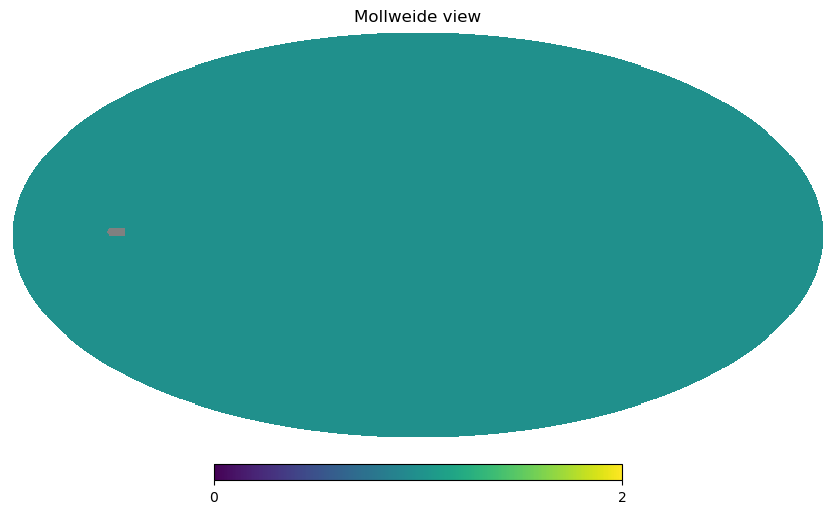

gama15h_pdr1.fits
Number of observed objects = 7681225
Number of stars = 1384985 (0.18030782850391702)


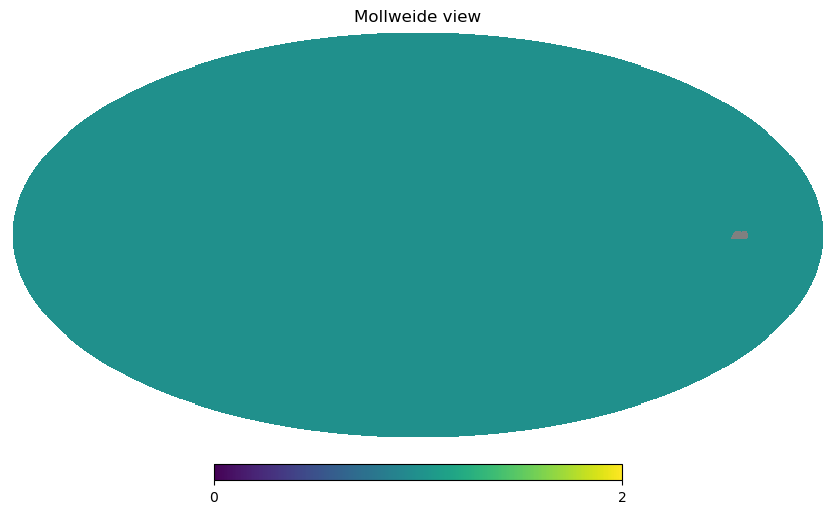

wide12h_pdr1.fits
Number of observed objects = 5625072
Number of stars = 898111 (0.15966213410246127)


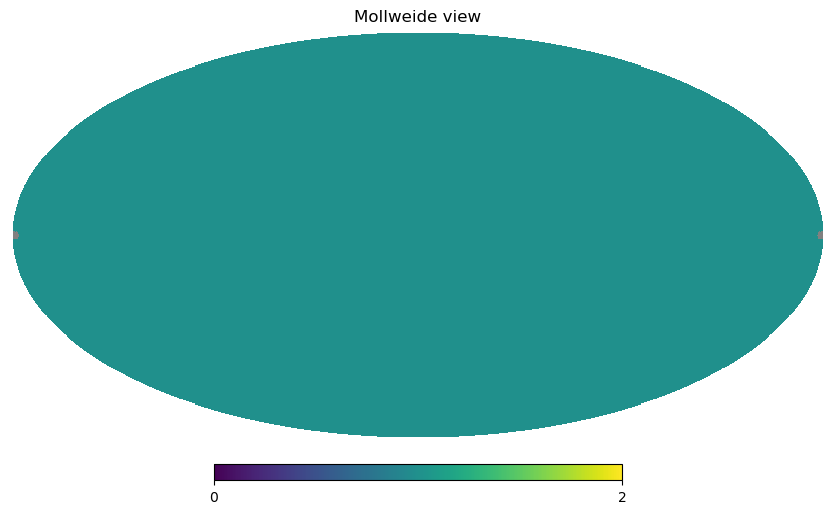

xmm_pdr1.fits
Number of observed objects = 8308926
Number of stars = 1354842 (0.16305861912839276)


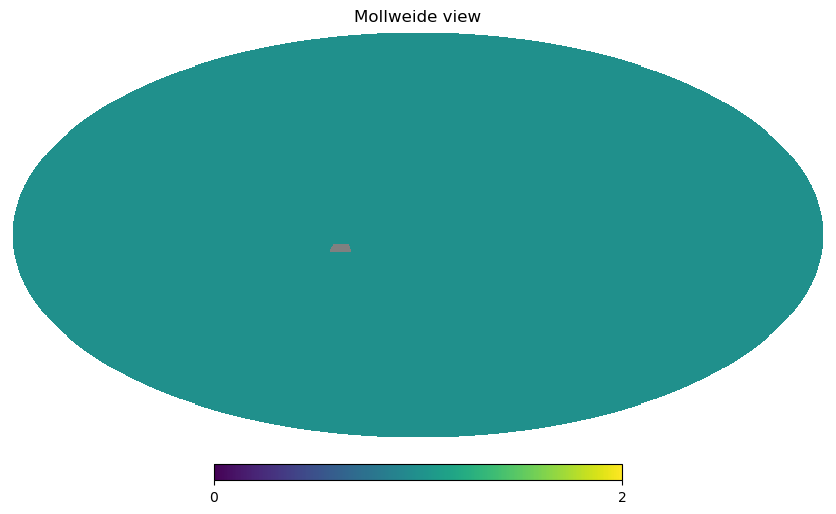

vvds_pdr1.fits
Number of observed objects = 11167565
Number of stars = 1792328 (0.16049407368571394)


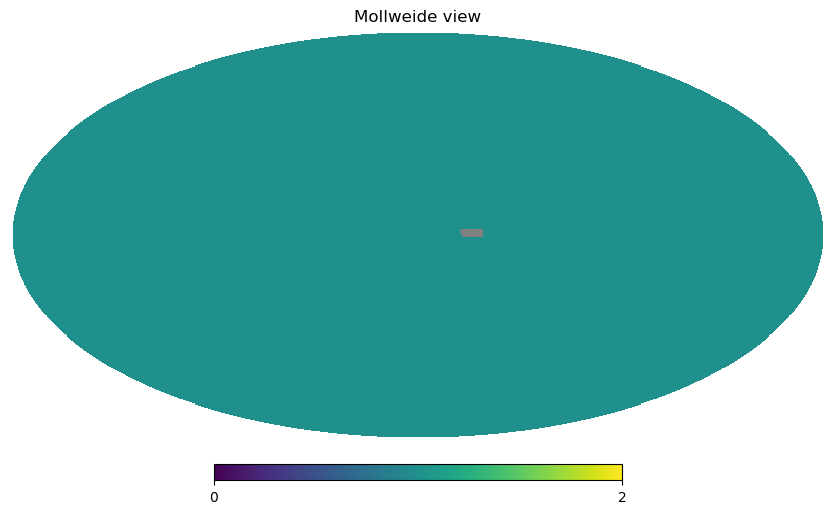

In [16]:
for fname in ['gama09h_pdr1.fits', 'gama15h_pdr1.fits', 'wide12h_pdr1.fits', 'xmm_pdr1.fits', 'vvds_pdr1.fits']:
    print(fname)
    fname = os.path.join(path, fname)
    hdul = fits.open(fname)
    data = hdul[1].data
    header = hdul[1].header
    
    stars_cond = data['iclassification_extendedness'] == 0
    no_stars_cond = (data['iclassification_extendedness'] != 0) * (~np.isnan(data['iclassification_extendedness']))
    
    ra = data['ra']
    print(f'Number of observed objects = {len(ra)}')
    dec = data['dec']

    ra_stars = ra[stars_cond]
    print(f'Number of stars = {sum(stars_cond)} ({sum(stars_cond) / len(ra)})')
    dec_stars = dec[stars_cond]

    ra_no_stars = ra[no_stars_cond]
    dec_no_stars = dec[no_stars_cond]
    
    # Create a SkyCoord object with RA and Dec
    pix_indices = RaDecToIndex(ra_deg = ra_stars,
                               dec_deg = dec_stars,
                               nside = nside)

    mask = np.ones(12 * nside ** 2)
    mask[pix_indices] *= hp.UNSEEN
    hp.mollview(mask, nest=False)
    plt.show()
    plt.close()